- What is the overall sales trend?
- What are the top 10 products by sales?
- What are the most selling products?
- What are the most referred ship mode?
- What are the most profitable category and sub-category?


<h4> Import required libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h4> Import data set

In [34]:
df = pd.read_excel('superstore_sales.xlsx')

In [3]:
#'C:\Users\anhqt\Documents\Business Analyst\Sales-Analysis-master\superstore_sales.xlsx'

In [35]:
df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


<h4> Data audit

In [36]:
# The first 5 rows of the data set
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [6]:
# The last 5 rows of the data set
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [7]:
# Count how many rows and columns of the data set
df.shape

(51290, 21)

In [8]:
# Display all the coulumns in the data set
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [9]:
# Summary of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
order_id          51290 non-null object
order_date        51290 non-null datetime64[ns]
ship_date         51290 non-null datetime64[ns]
ship_mode         51290 non-null object
customer_name     51290 non-null object
segment           51290 non-null object
state             51290 non-null object
country           51290 non-null object
market            51290 non-null object
region            51290 non-null object
product_id        51290 non-null object
category          51290 non-null object
sub_category      51290 non-null object
product_name      51290 non-null object
sales             51290 non-null float64
quantity          51290 non-null int64
discount          51290 non-null float64
profit            51290 non-null float64
shipping_cost     51290 non-null float64
order_priority    51290 non-null object
year              51290 non-null int64
dtypes: datetime64[ns](2), float6

In [10]:
# Check for missing values in the data set
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [11]:
# Summary of the data set in statistical way
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


<h3> Data analysis

<h4> What is the overall sales trend?

In [12]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [13]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [14]:
# Create new columns and assign year and month in y-m format
df['year_month'] = df['order_date'].apply(lambda x : x.strftime('%Y-%m'))

In [15]:
df['year_month']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
5        2011-01
6        2011-01
7        2011-01
8        2011-01
9        2011-01
10       2011-01
11       2011-01
12       2011-01
13       2011-01
14       2011-01
15       2011-01
16       2011-01
17       2011-01
18       2011-01
19       2011-01
20       2011-01
21       2011-01
22       2011-01
23       2011-01
24       2011-01
25       2011-01
26       2011-01
27       2011-01
28       2011-01
29       2011-01
          ...   
51260    2014-12
51261    2014-12
51262    2014-12
51263    2014-12
51264    2014-12
51265    2014-12
51266    2014-12
51267    2014-12
51268    2014-12
51269    2014-12
51270    2014-12
51271    2014-12
51272    2014-12
51273    2014-12
51274    2014-12
51275    2014-12
51276    2014-12
51277    2014-12
51278    2014-12
51279    2014-12
51280    2014-12
51281    2014-12
51282    2014-12
51283    2014-12
51284    2014-12
51285    2014-12
51286    2014-12
51287    2014-

In [16]:
# Using groupby function to get the sum of each month
df.groupby('year_month').sum()

,sales,quantity,discount,profit,shipping_cost,year
year_month,,,,,,
2011-01,98898.48886,1463,68.758,8321.80096,10544.78800,870763
2011-02,91152.15698,1224,52.252,12417.90698,10681.16300,760158
2011-03,145729.36736,1836,74.212,15303.56826,13096.18550,1083929
2011-04,116915.76418,2020,80.782,12902.32438,12954.52000,1134204
2011-05,146747.83610,2013,82.382,12183.82870,16443.20600,1138226
2011-06,215207.38022,3112,159.534,23415.24702,23813.10900,1844087
2011-07,115510.41912,1774,80.086,5585.00352,11844.47600,995445
2011-08,207581.49122,3035,121.462,23713.66772,22001.13600,1765658
2011-09,290214.45534,3707,137.678,35776.88394,29664.85100,2115572


In [17]:
# Fetch the sum of sale from the new data set
df_trend = df.groupby('year_month').sum()['sales'].reset_index()

In [18]:
df_trend

,year_month,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


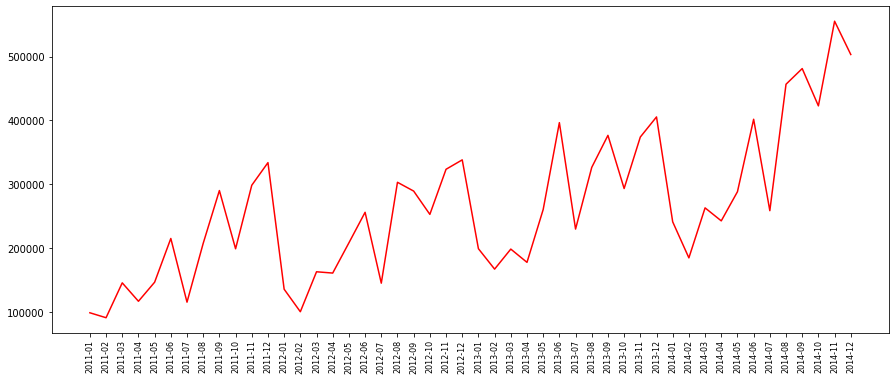

In [19]:
# Visualize sale trend using matplot library
plt.figure(figsize=(15,6))
plt.plot(df_trend['year_month'],df_trend['sales'], color='red')
plt.xticks(rotation='vertical', size=8)
plt.show()

<h2> What are the top 10 products by sale?

In [20]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [21]:
df.groupby('product_name').sum()

,sales,quantity,discount,profit,shipping_cost,year
product_name,,,,,,
"""While you Were Out"" Message Book, One Form per Page",25.2280,8,0.40,10.3880,3.100,6042
"#10 Gummed Flap White Envelopes, 100/Box",41.3000,11,0.40,16.7678,2.090,8052
#10 Self-Seal White Envelopes,108.6820,10,0.20,52.1230,11.430,8053
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.9040,32,0.40,223.1408,53.030,14088
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.6720,37,0.80,115.2806,34.950,20124
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",146.6880,21,0.60,64.8636,13.140,16105
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",176.2880,13,0.20,63.7470,11.130,4026
#6 3/4 Gummed Flap White Envelopes,71.2800,9,0.80,24.9480,5.440,8052
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",2706.0800,14,0.40,578.6848,209.500,12076


In [22]:
# Create new data frame and assign to the new data frame
product_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [23]:
# Display sum of sale from highest to lowest groupby product name
product_sales = product_sales.sort_values('sales', ascending=False)

In [24]:
# Top 10 highest sale performance by product name
product_sales.head(10)
# Or using product_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<h4> THe most selling products

In [25]:
# Get product by grouping name
most_sale_products = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

In [26]:
most_sale_products.sort_values('quantity',ascending=False)

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


In [27]:
most_sale_products[:10]

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",21
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",13
#6 3/4 Gummed Flap White Envelopes,9
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",14


<h4> What is the most referred ship mode

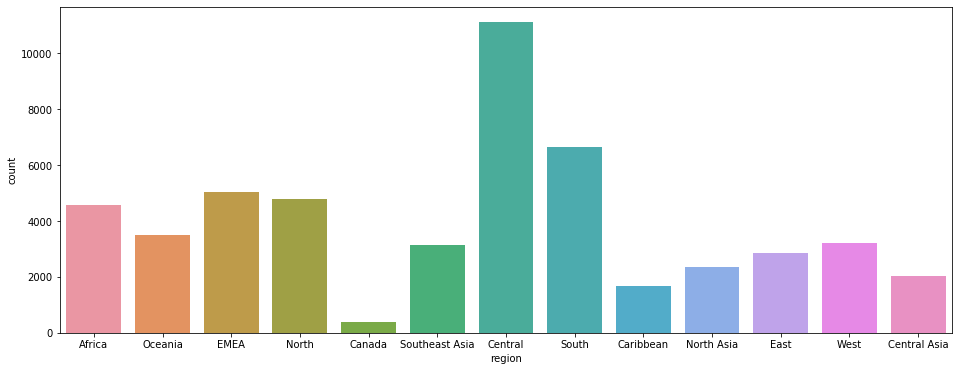

In [28]:
# Using seaborn to visualize sale by region
plt.figure(figsize=(16,6))
sns.countplot(df['region'])

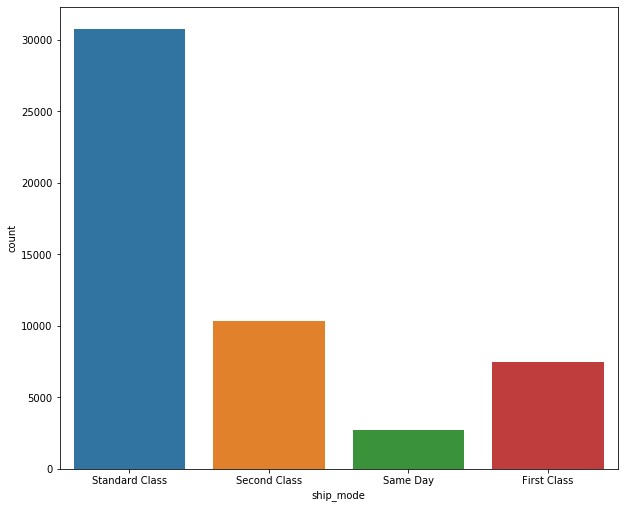

In [29]:
# Using seaborn to visualize ship_mode
plt.figure(figsize=(10,8.5))
# plt.xlabel('Ship options')
sns.countplot(df['ship_mode'])
plt.show()

<h4> The most profitable category and sub-category

In [30]:
profit = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

In [31]:
profit.sort_values(['category', 'profit'],ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870